# visualize Gradient Descent using Contour plot

In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.preprocessing import StandardScaler


In [2]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\Advertising.csv"

In [3]:
# load the training data from glass data set
data = pd.read_csv(location)

In [4]:
X = np.column_stack((data['TV'], data['radio']))
y = data['sales']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# function to calculate the mse and derivate w.r.t w
def gradient_descent(W, x, y):
    
    # get the predicted y
    y_hat = x.dot(W).flatten()
    
    # calculate error/residual
    error = (y - y_hat)
    
    # calculate the MSE
    mse   = (1.0 / len(x)) * np.sum(np.square(error))
    
    # calculate the gradient
    gradient = -(1.0 / len(x)) * error.dot(x)
    
    return gradient, mse

In [7]:
# set values
w         = np.array((-40, -40))
alpha     = .1
tolerance = 1e-3
 
old_w  = []
errors = []

# Perform Gradient Descent
iterations = 1
for i in range(200):
    
    gradient, error = gradient_descent(w, X_scaled, y)
    
    new_w = w - alpha * gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)


Iteration: 10 - Error: 732.6317
Iteration: 20 - Error: 256.7896
Iteration: 30 - Error: 205.5887
Iteration: 40 - Error: 200.0794
Iteration: 50 - Error: 199.4866
Iteration: 60 - Error: 199.4228
Iteration: 70 - Error: 199.4159
Iteration: 80 - Error: 199.4152
Gradient Descent has converged
w = [3.91359776 2.77964408]


In [8]:
# create contour plot
all_ws = np.array(old_w)
 
# Just for visualization
errors.append(600)
errors.append(500)
errors.append(400)
errors.append(300)
errors.append(225)
 
levels = np.sort(np.array(errors))

In [9]:
levels

array([199.41516524, 199.41590397, 199.4227686 , 199.48656054,
       200.07938649, 205.5887133 , 225.        , 256.78961856,
       300.        , 400.        , 500.        , 600.        ,
       732.63169338])

#### Prepare Axis (w0, w1)
create the w0 and w1 (X1 and X2) vector ( 1 X 100). Last time we used the np.linspace() function and randomly chose some values. Here we will use the converged values of w to create a space around it.

Our w0 array will be equally spaced 100 values between -w[0] * 5 and +w[0] * 5. Same for the w1.

The mse_vals variable is just a placeholder.

In [10]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)

mse_vals = np.zeros(shape=(w0.size, w1.size))

#### Prepare the 3rd Dimension :
calculate the mse for each combination of w0 and w1.

In [11]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))
        
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, y)[1]


#### Final contour Plot:

- Use the contourf() function first. Pass the levels we created earlier.
- Plot two axis line at w0=0 and w1=1
- Call the plt.annotate() function in loops to create the arrow which shows the convergence path of the gradient descent. We will use the stored w values for this. The mse for those w values have already been calculated.
- Invoke the contour() function for the contour line plot.

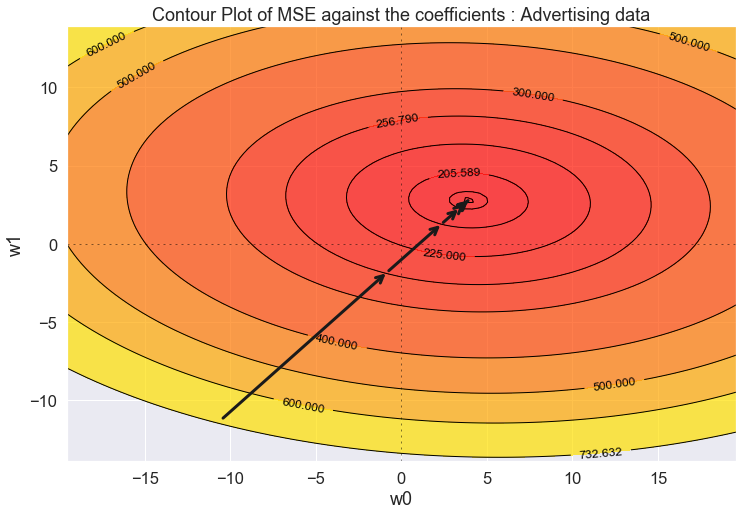

In [12]:
cm = plt.cm.get_cmap('autumn')
plt.figure(figsize=(12, 8))

plt.contourf(w0, w1, mse_vals, levels, alpha=.7, cmap=cm)
 
cplt = plt.contour(w0, w1, mse_vals, levels, linewidths=1, colors='black')
plt.clabel(cplt, inline=1, fontsize=12)

for i in range(len(old_w) - 1):
    
    plt.annotate('', 
                 xy=all_ws[i + 1, :], 
                 xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 
                             'color': 'k', 
                             'lw': 3},
                 va='center', 
                 ha='center')

    
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)

plt.title("Contour Plot of MSE against the coefficients : Advertising data")

plt.xlabel("w0")
plt.ylabel("w1");
